<a href="https://colab.research.google.com/github/jyothign0/Deep-Learning/blob/main/DigitRecognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
mnist=tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test)=mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


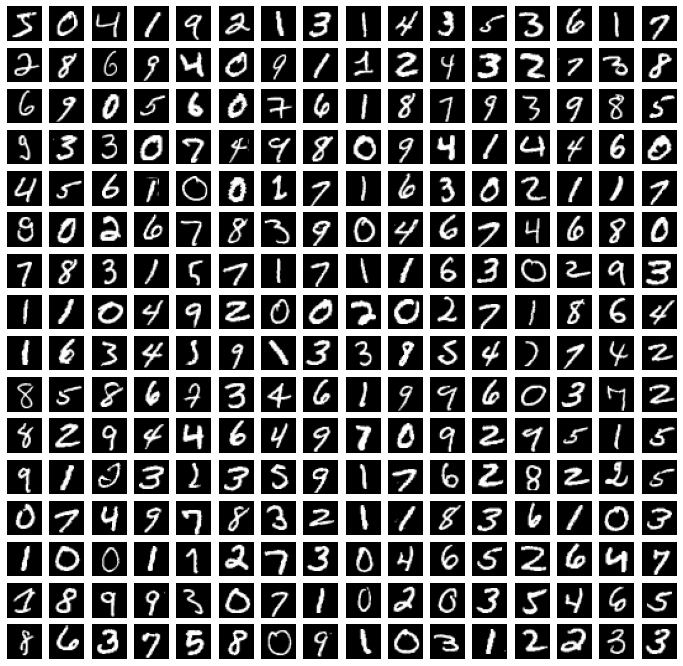

In [ ]:
plt.figure(figsize=(12,12))
for i in range(256):
  plt.subplot(16,16,i+1)
  plt.axis('off')
  plt.imshow(x_train[i].reshape(28,28),cmap='gray')

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [ ]:
x_train = x_train.reshape([60000, 28, 28, 1])
x_test = x_test.reshape([10000, 28, 28, 1])

In [ ]:
from keras.utils.np_utils import to_categorical
y_train = to_categorical(y_train, num_classes = 10)
y_test = to_categorical(y_test, num_classes = 10)

In [ ]:
#Reshape has to done because Neural Network has to accept. 28, 28, 1. 1 represent channel that is Gray. For RGB it is 3
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28, 1)
(60000, 10)
(10000, 28, 28, 1)
(10000, 10)


In [ ]:
#Data Augmentation on Images Instead of feeding data by batches
train_datagen = ImageDataGenerator(
    rescale = 1/255,
    rotation_range = 10,
    zoom_range = 0.1,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    horizontal_flip = False,
    vertical_flip = False   
)
train_datagen.fit(x_train)
val_datagen = ImageDataGenerator(rescale = 1/255)
val_datagen.fit(x_test)

In [ ]:
#image is sent has it is so use convolution network (Architecture creation)
model = tf.keras.models.Sequential([
                  tf.keras.layers.Conv2D(32,(5,5),activation='relu',input_shape=(28,28,1)),
                  tf.keras.layers.MaxPool2D(2,2),
                  tf.keras.layers.Conv2D(64,(3,3),activation='relu',padding='same'),
                  tf.keras.layers.MaxPool2D(2,2),
                  tf.keras.layers.Conv2D(128,(3,3),activation='relu',padding='same'),
                  tf.keras.layers.MaxPool2D(2,2),
                  tf.keras.layers.Flatten(),
                  tf.keras.layers.Dense(256, activation = 'relu'),
                  tf.keras.layers.Dense(10, activation = 'softmax')
])
#number of filters increases to extract more features
#Padding same means one layer

In [ ]:
#Calculation of Number of Parameters
5*5*1*32+32
3*3*32*64+64
3*3*64*128+128

73856

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 6, 6, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 3, 3, 128)        0

In [ ]:
#Compilation step
from tensorflow.keras.optimizers import Adam
optimizer=Adam(lr=0.001,beta_1=0.9,beta_2=0.999)
model.compile(optimizer=optimizer,
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
history = model.fit(
    train_datagen.flow(x_train,y_train, batch_size = 256),
    validation_data = val_datagen.flow(x_test, y_test),
    epochs = 20,
    verbose = 1
)
#235 is iteration. 60000/256

Epoch 1/20
235/235 [==============================] - 54s 102ms/step - loss: 0.3768 - accuracy: 0.8814 - val_loss: 0.0598 - val_accuracy: 0.9811
Epoch 2/20
235/235 [==============================] - 24s 101ms/step - loss: 0.1046 - accuracy: 0.9671 - val_loss: 0.0320 - val_accuracy: 0.9885
Epoch 3/20
235/235 [==============================] - 24s 100ms/step - loss: 0.0727 - accuracy: 0.9782 - val_loss: 0.0332 - val_accuracy: 0.9895
Epoch 4/20
235/235 [==============================] - 24s 101ms/step - loss: 0.0580 - accuracy: 0.9819 - val_loss: 0.0398 - val_accuracy: 0.9884
Epoch 5/20
235/235 [==============================] - 24s 101ms/step - loss: 0.0518 - accuracy: 0.9844 - val_loss: 0.0239 - val_accuracy: 0.9920
Epoch 6/20
235/235 [==============================] - 24s 101ms/step - loss: 0.0462 - accuracy: 0.9858 - val_loss: 0.0197 - val_accuracy: 0.9930
Epoch 7/20
235/235 [==============================] - 24s 100ms/step - loss: 0.0383 - accuracy: 0.9877 - val_loss: 0.0203 - val_ac

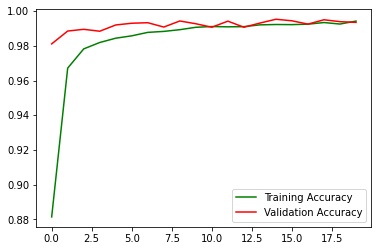

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.figure()
plt.plot(acc, color = 'green', label = 'Training Accuracy')
plt.plot(val_acc, color = 'red', label = 'Validation Accuracy')
plt.legend()

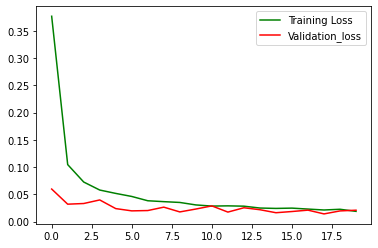

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
plt.figure()
plt.plot(loss, color = 'green', label = 'Training Loss')
plt.plot(val_loss, color = 'red', label = 'Validation_loss')
plt.legend()

In [ ]:
np.argmax(y_test[:9],axis=1)

array([7, 2, 1, 0, 4, 1, 4, 9, 5])

In [ ]:
predictions=model.predict(x_test[:9])
predictions

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
np.argmax(predictions,axis=1)

array([7, 2, 1, 0, 4, 1, 4, 9, 5])